In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["GEOMSTATS_BACKEND"] = "pytorch"

### Visualize Sphere & Torus data

In [2]:
from datasets.synthetic import load_s2_synthetic as load_sphere

embedding_dim = 3
rot = torch.eye(3)
n_times = 80
radius = 1
distortion_amp = 0.5
noise_var = 1e-4

sphere_data, labels = load_sphere(rot, n_times,radius, distortion_amp,embedding_dim, noise_var)

INFO: Using pytorch backend


(-1.108251175544153,
 1.1155953917214536,
 -1.116894569184194,
 1.1152465888175782)

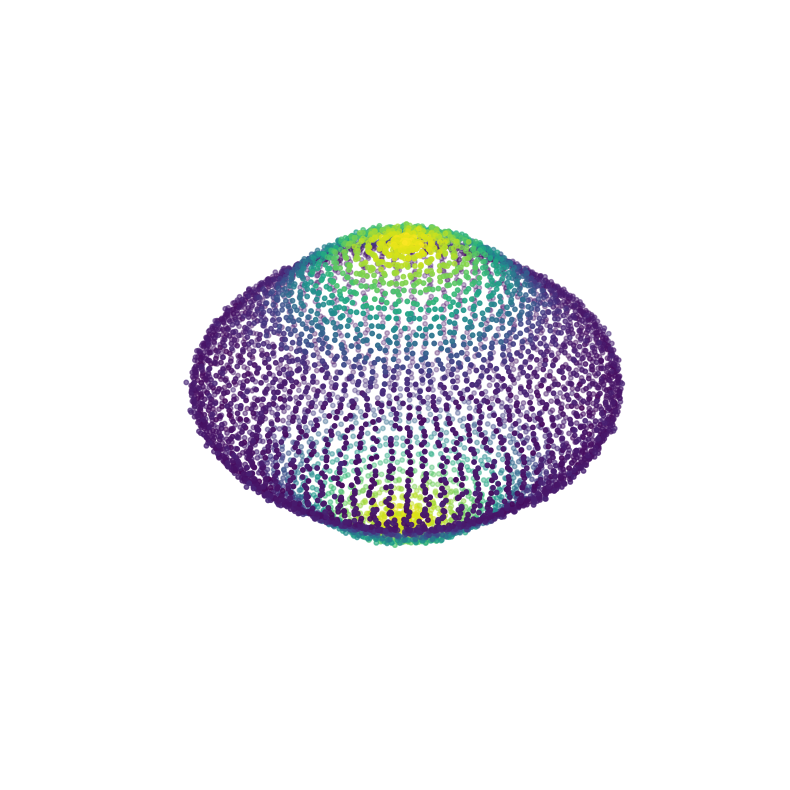

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

x = sphere_data[:,0]
y = sphere_data[:,1]
z = sphere_data[:,2]

ax.scatter3D(x, y, z, s=10, c = np.linalg.norm(sphere_data,axis=1))

ax.view_init(elev=30, azim=45, roll=0)

plt.axis("off")



In [25]:
from datasets.synthetic import load_t2_synthetic as load_torus

embedding_dim = 3
rot = torch.eye(3)
n_times = 200
major_radius = 2
minor_radius = 1
distortion_amp = 0.2
noise_var = 1e-4

torus_data, labels = load_torus(rot, n_times,major_radius, minor_radius, distortion_amp,embedding_dim, noise_var)

x = torus_data[:,0]
y = torus_data[:,1]
z = torus_data[:,2]

norms = np.linalg.norm(torus_data,axis=1)

In [26]:
labels

,thetas,psis
0,0.000000,0.000000
1,0.000000,0.031574
2,0.000000,0.063148
3,0.000000,0.094721
4,0.000000,0.126295
...,...,...
39995,6.283185,6.156890
39996,6.283185,6.188464
39997,6.283185,6.220038
39998,6.283185,6.251612


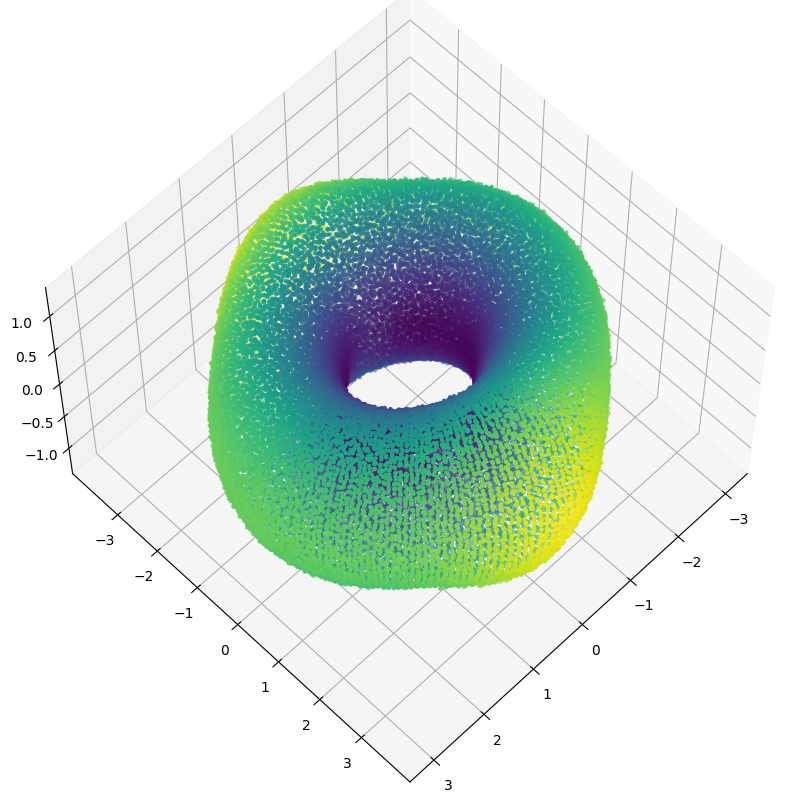

In [9]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


ax.scatter3D(x, y, z, s=5, c = norms)
ax.view_init(elev=60, azim=45, roll=0)

In [7]:
thetas = torch.linspace(0, torch.pi, n_times)

phis = torch.linspace(0, 2 * torch.pi, n_times)

angles = torch.cartesian_prod(thetas, phis)

In [8]:
angles.shape

torch.Size([6400, 2])

In [16]:
thetas = angles[:,0]
phis = angles[:,1]

In [5]:
import torch
import matplotlib.pyplot as plt

In [6]:
from plots import plot_recon
import datasets.utils
import default_config as config

n_times = 100
filename = "/Users/franciscoacosta/Desktop/code/neuralgeom/neuralgeom/results/trained_models/s2_synthetic_2022-09-25 12:04:00_model.pt"

angles = torch.cartesian_prod(torch.linspace(0,torch.pi,n_times),torch.linspace(0,2*torch.pi,n_times))

dataset_torch, labels, train_loader, test_loader = datasets.utils.load(config)

Dataset shape: torch.Size([1600, 3]).


(-1.4618472424204303,
 1.4753483791569626,
 -1.104937078647248,
 1.0722800961673382)

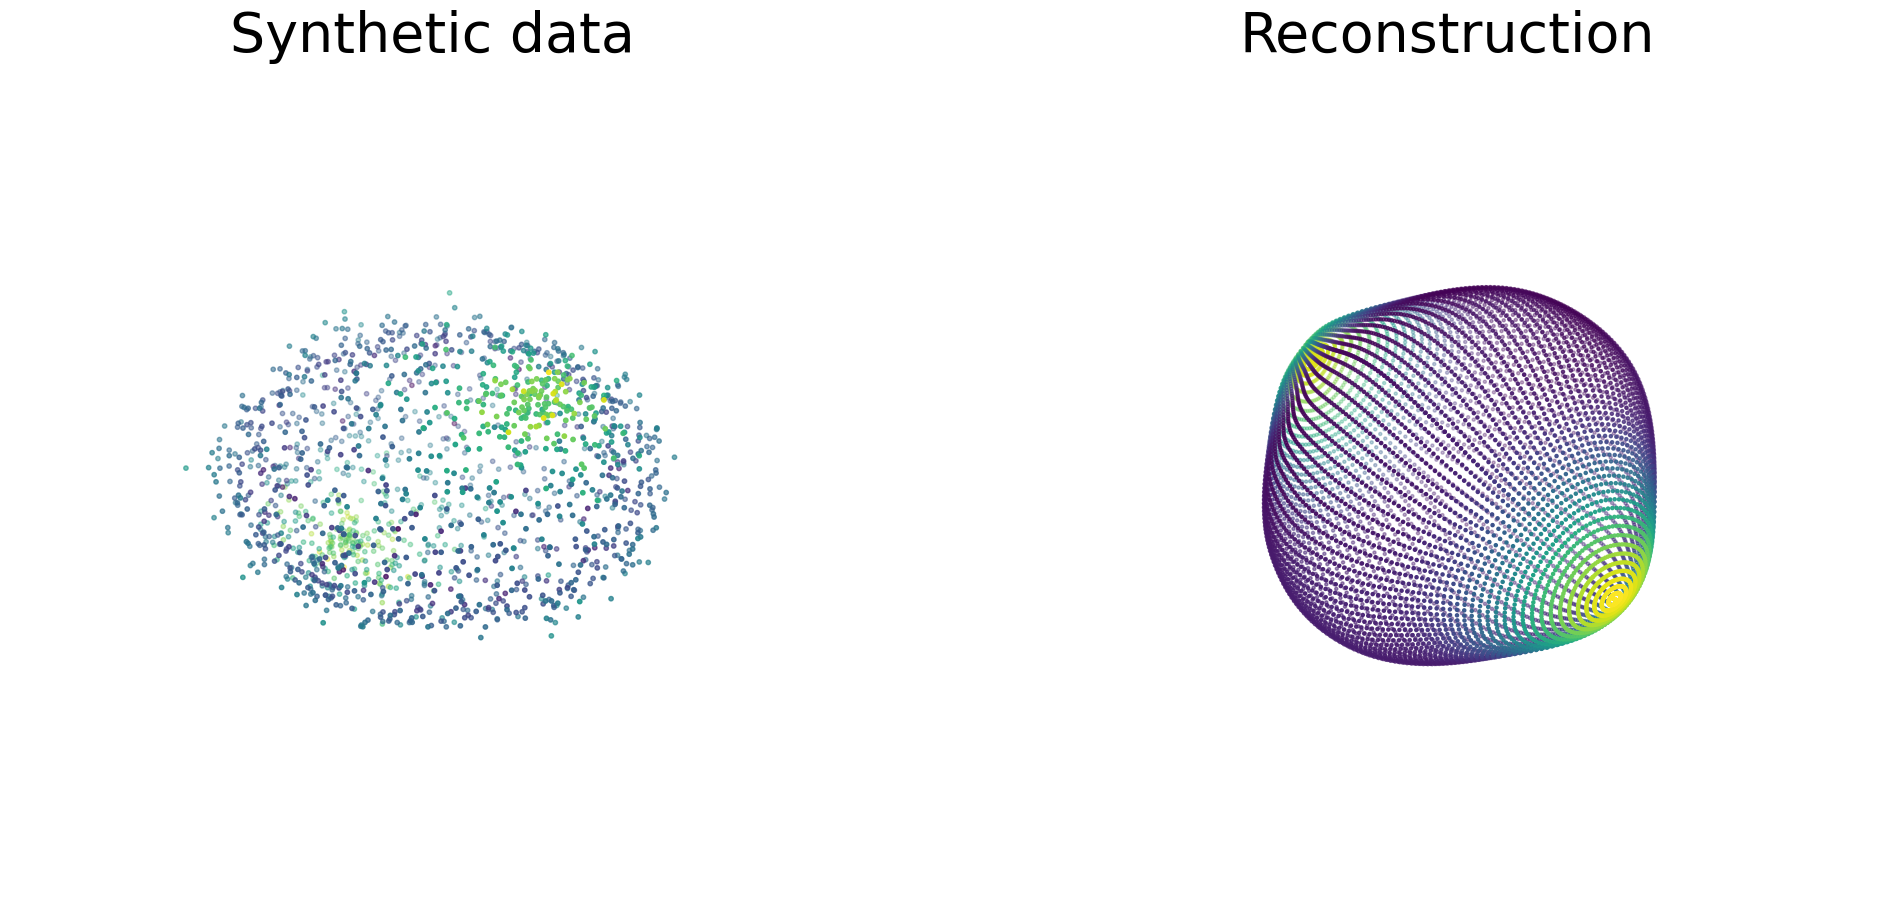

In [7]:
model = torch.load(filename)
fig = plt.figure(figsize=(24,12))
ax_data = fig.add_subplot(1,2,1, projection="3d")
x_data = dataset_torch[:,0]
y_data = dataset_torch[:,1]
z_data = dataset_torch[:,2]
norms_data = torch.linalg.norm(dataset_torch,axis=1).detach().numpy()
thetas = angles[:,0]
phis = angles[:,1]
z = torch.stack([torch.sin(thetas)*torch.cos(phis), torch.sin(thetas)*torch.sin(phis), torch.cos(thetas)], axis=-1)
z = z.to(config.device)
rec = model.decode(z)
norms_rec = torch.linalg.norm(rec,axis=1).detach().numpy()
x_rec = rec[:,0]
x_rec = [x.item() for x in x_rec]
y_rec = rec[:,1]
y_rec = [y.item() for y in y_rec]
z_rec = rec[:,2]
z_rec = [w.item() for w in z_rec]

ax_data.set_title("Synthetic data", fontsize=40)
sc_data = ax_data.scatter3D(x_data, y_data, z_data, s=10, c = norms_data)
plt.axis("off")
#ax_data.view_init(elev=60, azim=45, roll=0)
ax_rec = fig.add_subplot(1,2,2, projection="3d")
ax_rec.set_title("Reconstruction", fontsize=40)
sc_rec = ax_rec.scatter3D(x_rec,y_rec,z_rec,s=5,c = norms_rec)

plt.axis("off")